In [1]:
import cobra
from cobra.io import load_model

model = load_model("textbook")
len(model.metabolites), len(model.reactions)

(72, 95)

In [2]:
biomass_rxn = model.reactions.get_by_id("Biomass_Ecoli_core")
biomass_rxn

Reaction identifier,Biomass_Ecoli_core
Name,Biomass Objective Function with GAM
Memory address,0x7fca090366d0
Stoichiometry,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c... 1.496 3-Phospho-D-glycerate + 3.7478 Acetyl-CoA + 59.81 ATP + 0.361 D-Erythrose 4-phosphate + 0.0709 D-Fructose 6-phosphate + 0.129 Glyceraldehyde 3-phosphate + 0.205 D-Glucose 6-phosphate + 0.2557...
GPR,
Lower bound,0.0
Upper bound,1000.0


In [3]:
solution = model.optimize()
print(solution)

<Solution 0.874 at 0x7fca090dded0>



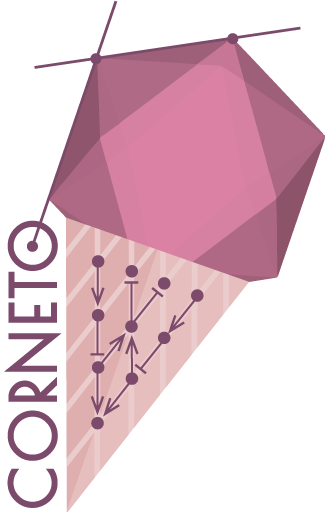

In [4]:
import corneto as cn
cn.info()

In [5]:
G = cn.Graph.from_cobra_model(model)
G.shape

(72, 95)

In [6]:
rid = list(G.get_edges_by_attr("id", biomass_rxn.id))[0]
G.get_attr_edge(rid)

{'__edge_type': 'directed',
 'id': 'Biomass_Ecoli_core',
 '__source_attr': {'3pg_c': {'__value': -1.496},
  'accoa_c': {'__value': -3.7478},
  'atp_c': {'__value': -59.81},
  'e4p_c': {'__value': -0.361},
  'f6p_c': {'__value': -0.0709},
  'g3p_c': {'__value': -0.129},
  'g6p_c': {'__value': -0.205},
  'gln__L_c': {'__value': -0.2557},
  'glu__L_c': {'__value': -4.9414},
  'h2o_c': {'__value': -59.81},
  'nad_c': {'__value': -3.547},
  'nadph_c': {'__value': -13.0279},
  'oaa_c': {'__value': -1.7867},
  'pep_c': {'__value': -0.5191},
  'pyr_c': {'__value': -2.8328},
  'r5p_c': {'__value': -0.8977}},
 '__target_attr': {'adp_c': {'__value': 59.81},
  'akg_c': {'__value': 4.1182},
  'coa_c': {'__value': 3.7478},
  'h_c': {'__value': 59.81},
  'nadh_c': {'__value': 3.547},
  'nadp_c': {'__value': 13.0279},
  'pi_c': {'__value': 59.81}},
 'default_lb': 0.0,
 'default_ub': 1000.0,
 'GPR': ''}

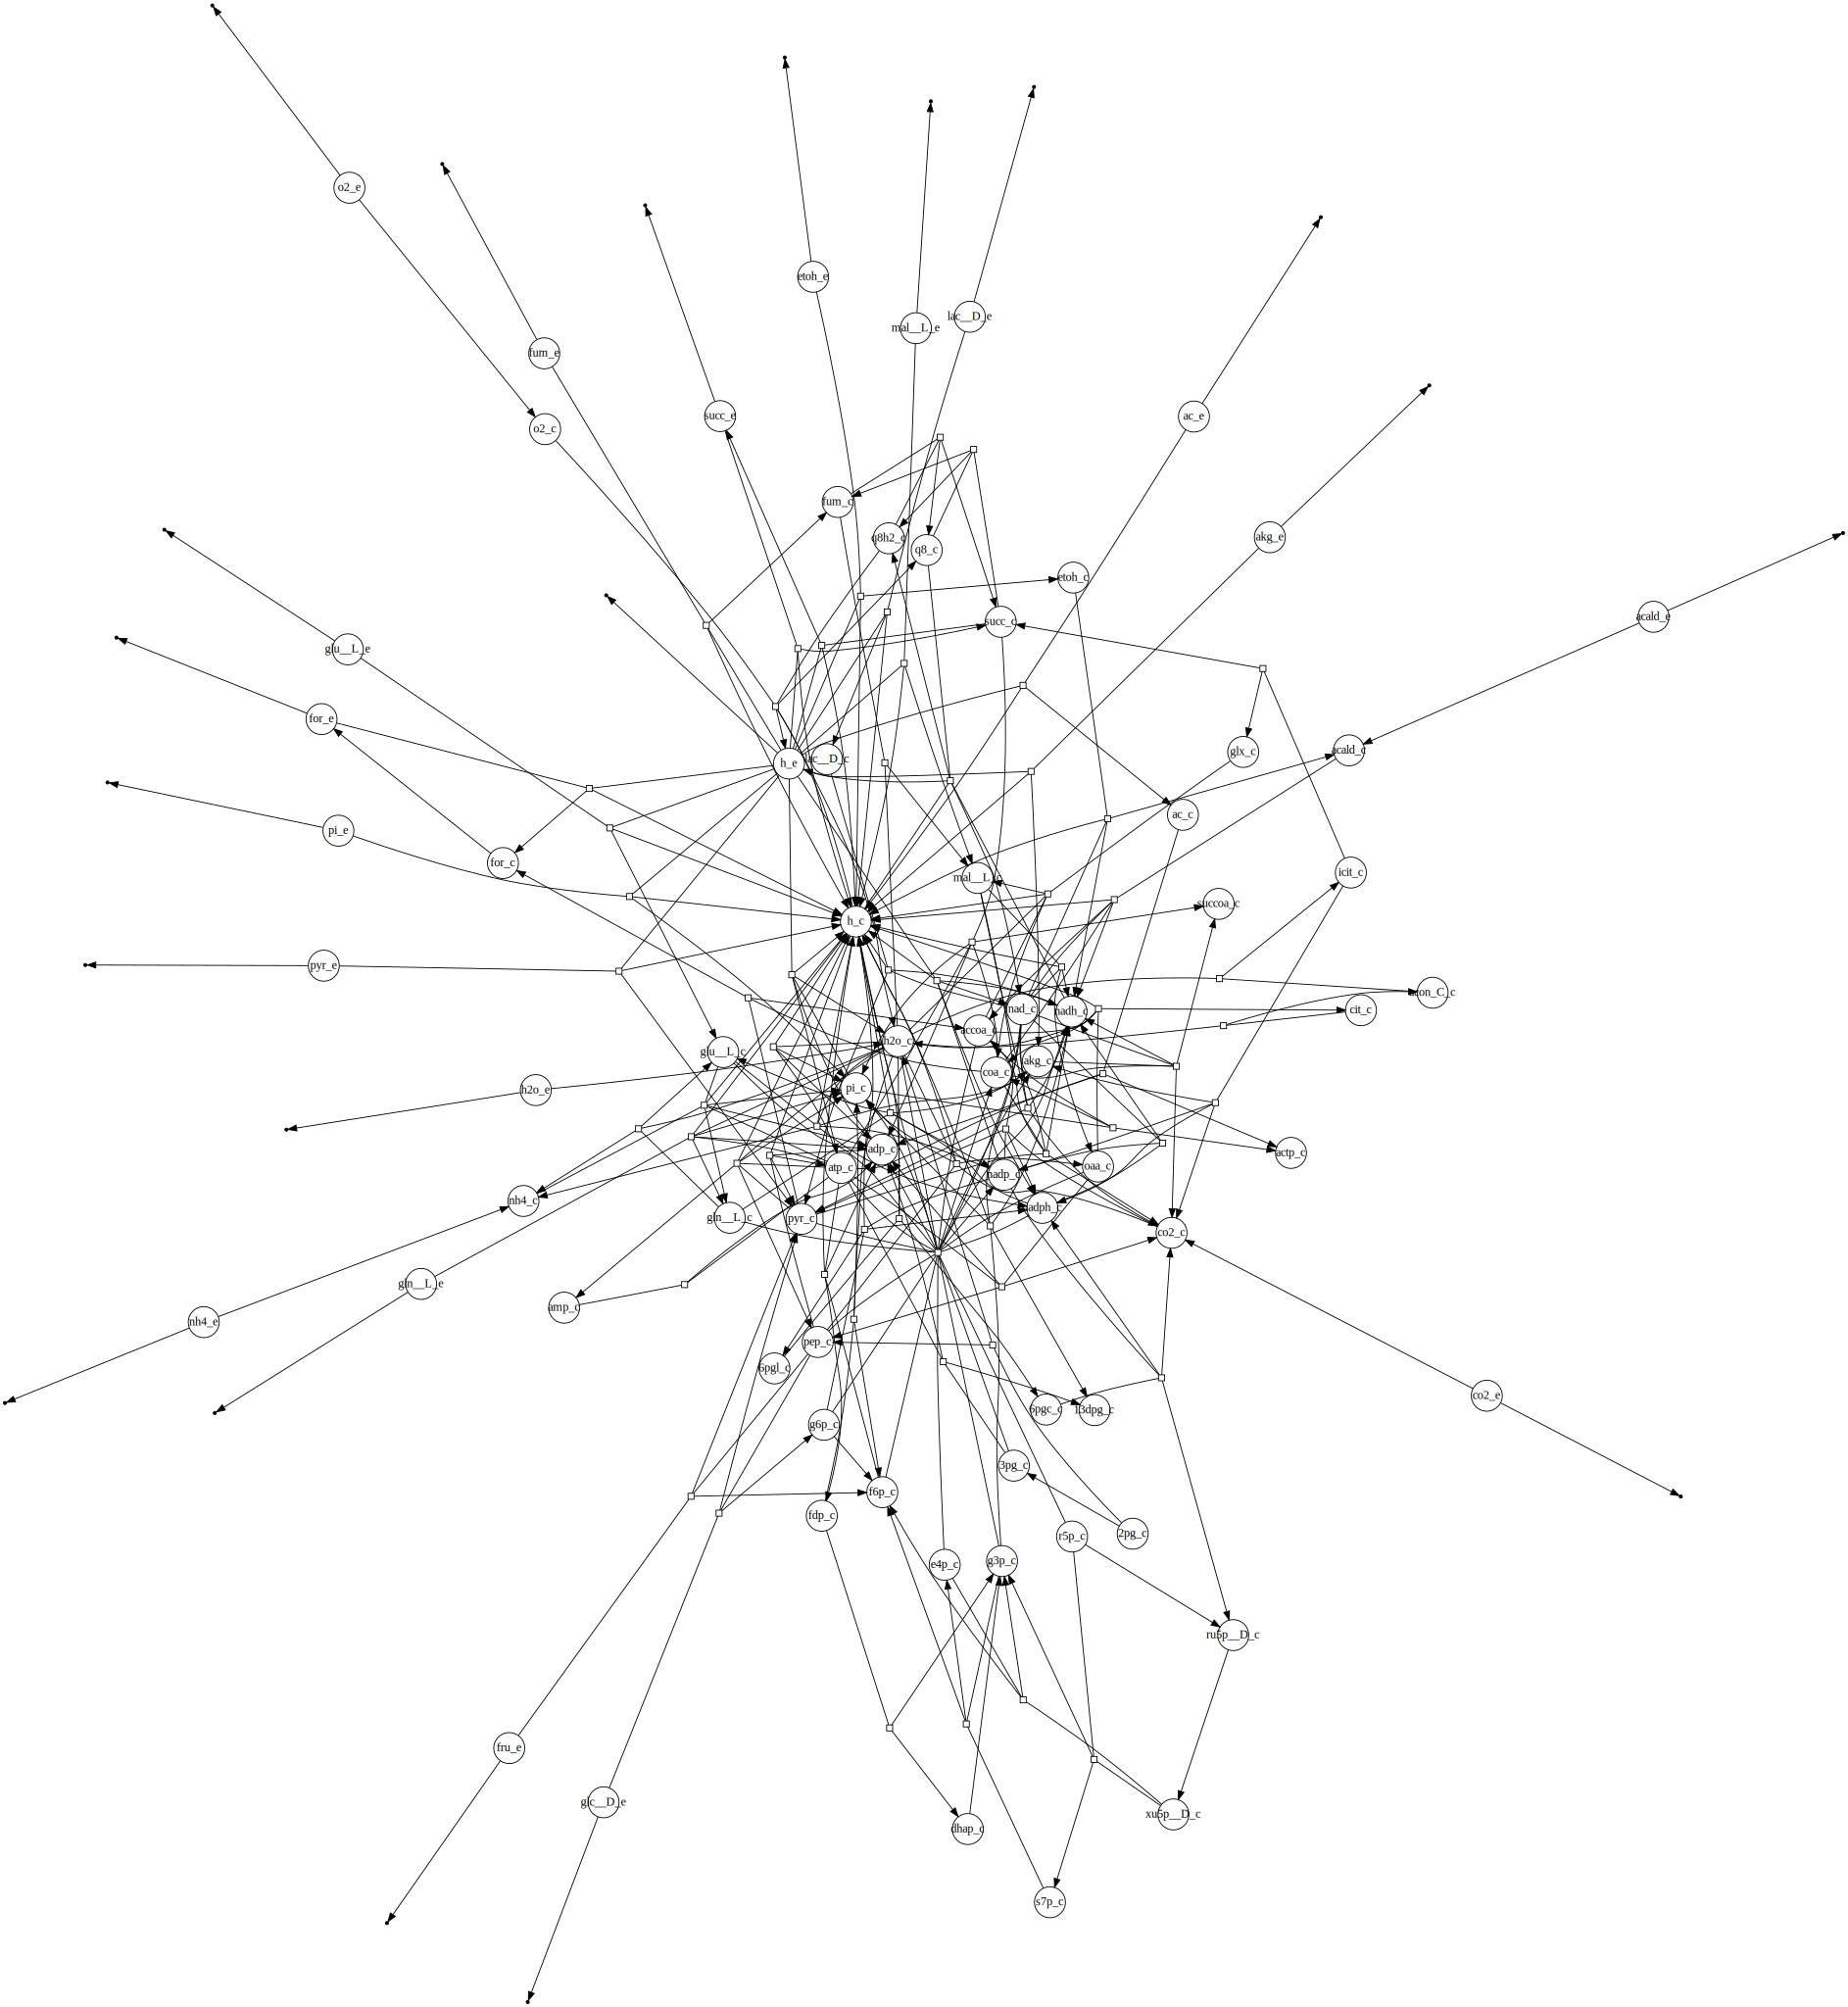

In [7]:
G.plot(layout="fdp")

In [8]:
from corneto.methods.metabolism.fba import fba_problem

P = fba_problem(G)
biomass = P.expr.flow[rid]
P.add_objectives(biomass, weights=-1)
P.solve()
print(biomass.value)

0.8739215069684303


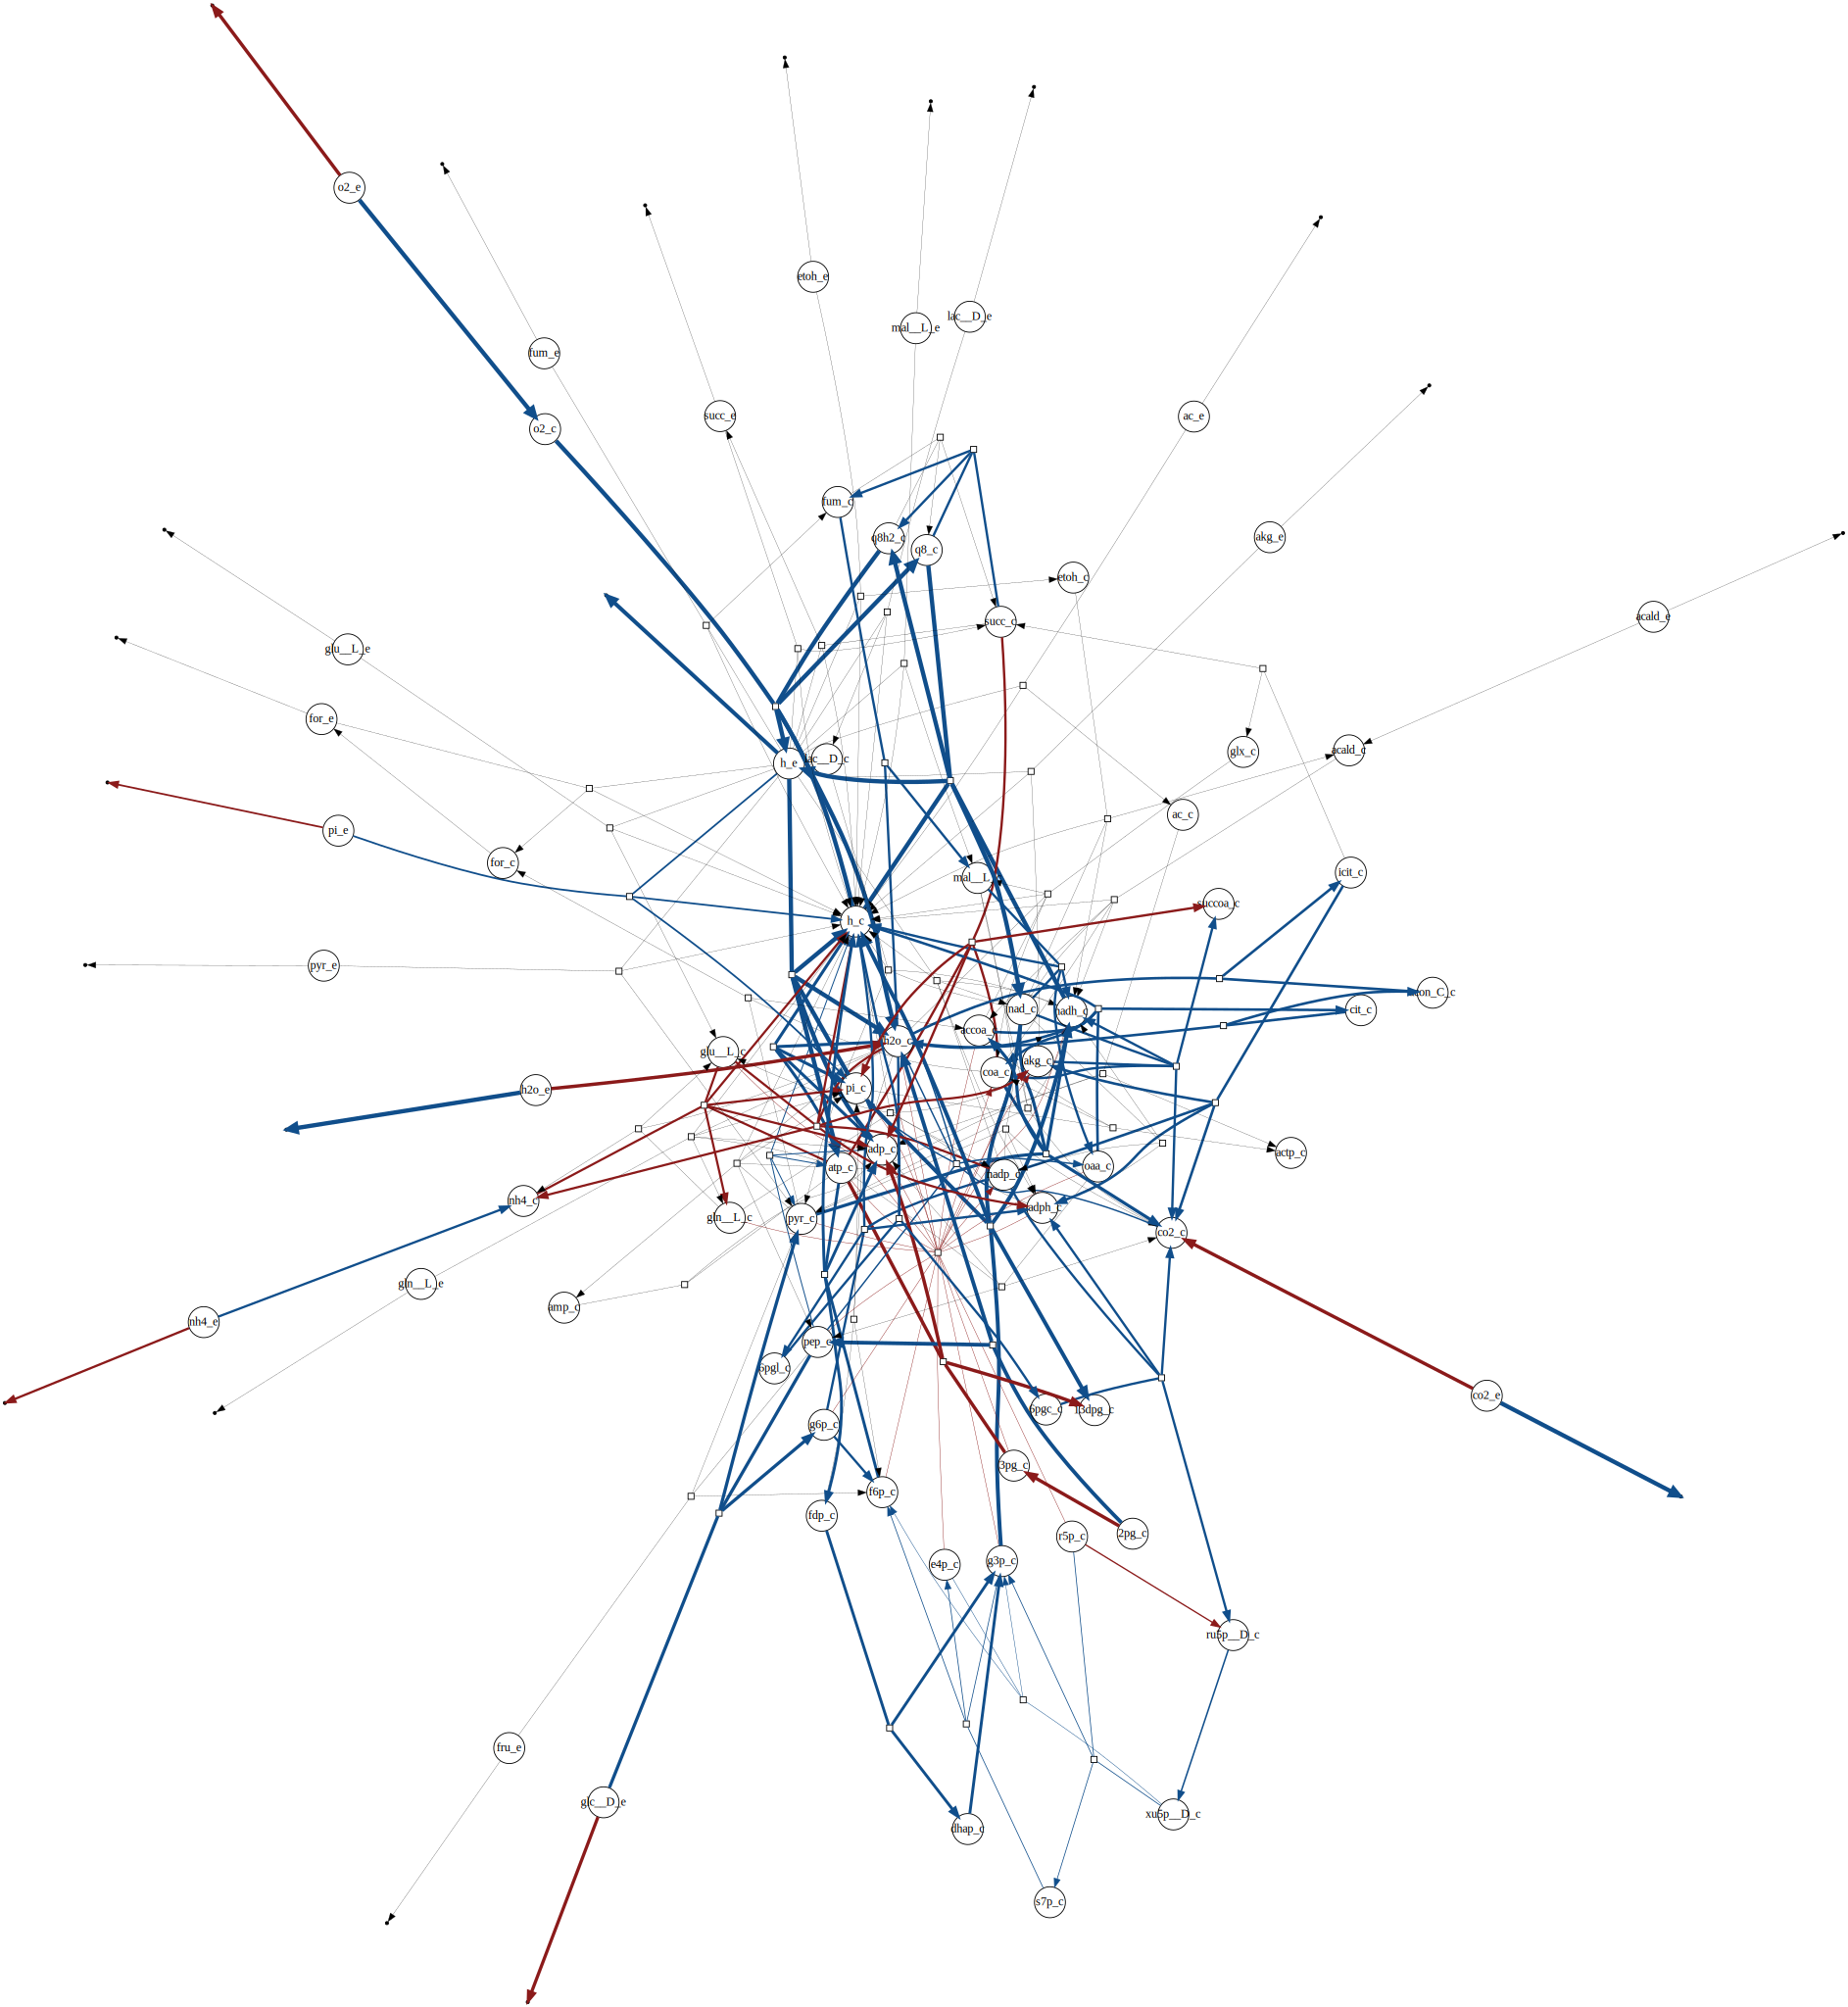

In [9]:
G.plot(custom_edge_attr=cn.pl.flow_style(P), layout="fdp")